## A] Import Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## B] TO Check Missing Data / Null values :

In [5]:
df.isnull().head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
df.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualization for To check Null Values :

<Axes: >

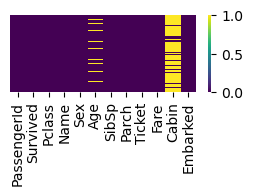

In [7]:
plt.figure(figsize=(3,1))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

## C] Data Cleaning :

### Drop Unnecessary Columns :

In [8]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Embarked: Fill with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Pclass', ylabel='Age'>

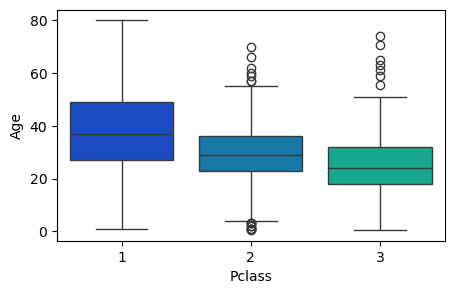

In [10]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Pclass', y='Age',data=df,palette='winter')

### we can see the higher classes tend to be older, which makes sense. We will use these average age values to impute based on Pclass for Age.

In [11]:
def impute_age(cols):
    Age =cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
df['Age'] =df[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

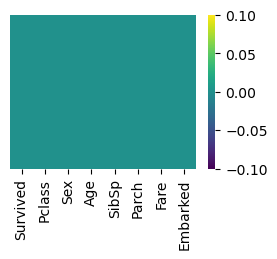

In [13]:
plt.figure(figsize=(3,2))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

## Encode Categorical Variables

In [14]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])  # female=0, male=1
df.head()
# One-hot encode 'Embarked' (multi-class)
#df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


### Scale Numerical Features :

In [15]:
# Standardize 'Age' and 'Fare'
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])


In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.533834,1,0,-0.502445,S
1,1,1,0,0.674891,1,0,0.786845,C
2,1,3,0,-0.231653,0,0,-0.488854,S
3,1,1,0,0.448255,1,0,0.420730,S
4,0,3,1,0.448255,0,0,-0.486337,S


### Visualize Outliers with Boxplots :

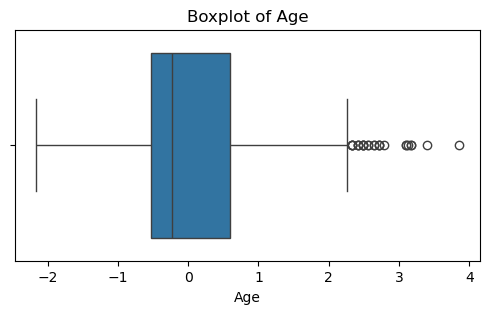

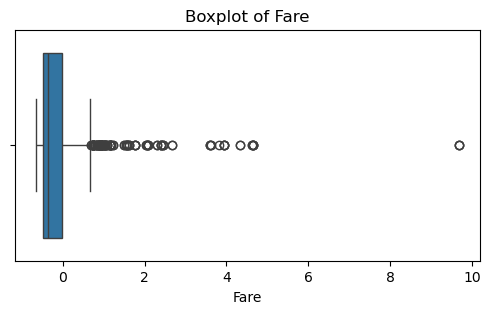

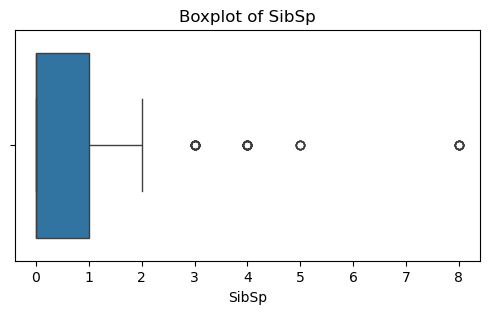

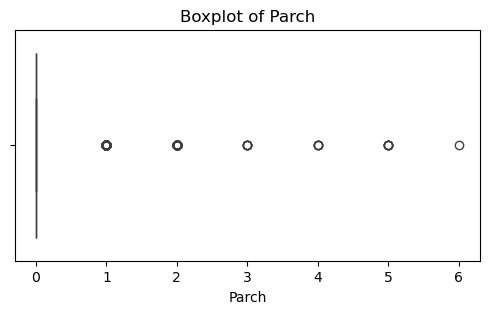

In [17]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Remove Outliers Using IQR Method :

In [18]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical column
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Show remaining data
print(df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare Embarked
0         0       3    1 -0.533834      1      0 -0.502445        S
2         1       3    0 -0.231653      0      0 -0.488854        S
3         1       1    0  0.448255      1      0  0.420730        S
4         0       3    1  0.448255      0      0 -0.486337        S
5         0       3    1 -0.382743      0      0 -0.478116        Q


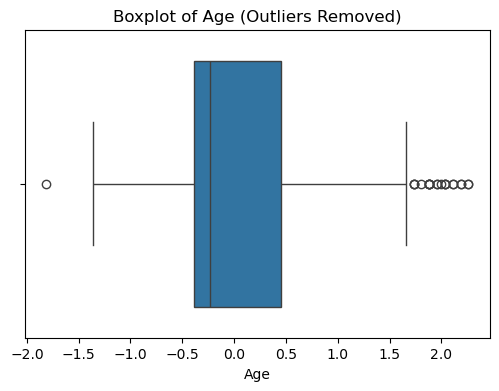

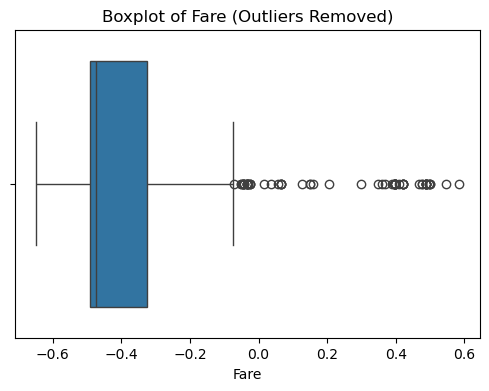

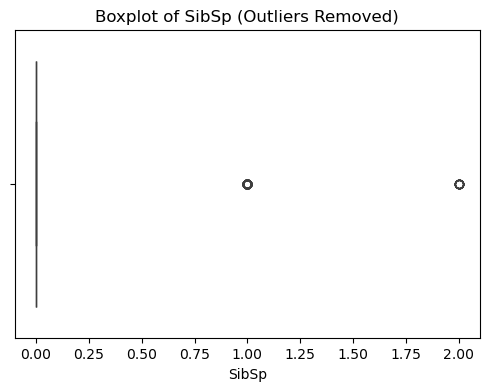

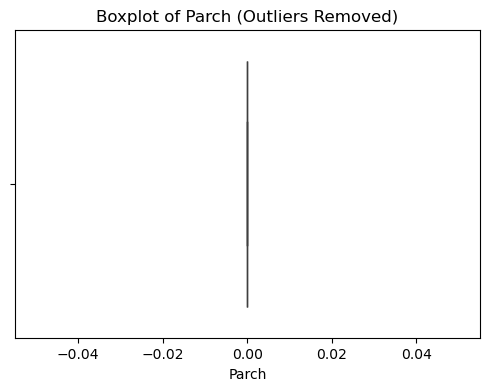

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.show()

### View Cleaned Dataset :

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.533834,1,0,-0.502445,S
2,1,3,0,-0.231653,0,0,-0.488854,S
3,1,1,0,0.448255,1,0,0.420730,S
4,0,3,1,0.448255,0,0,-0.486337,S
5,0,3,1,-0.382743,0,0,-0.478116,Q


In [20]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.0,589.000000
mean,0.298812,2.485569,0.752122,0.025830,0.195246,0.0,-0.345559
std,0.458126,0.743598,0.432147,0.733879,0.441370,0.0,0.253317
min,0.000000,1.000000,0.000000,-1.818103,0.000000,0.0,-0.648422
25%,0.000000,2.000000,1.000000,-0.382743,0.000000,0.0,-0.491874
50%,0.000000,3.000000,1.000000,-0.231653,0.000000,0.0,-0.474005
75%,1.000000,3.000000,1.000000,0.448255,0.000000,0.0,-0.324253
max,1.000000,3.000000,1.000000,2.261341,2.000000,0.0,0.583318


In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64